### Imports

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

### Load data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

### Data exploration and preparation

In [3]:
# Check if only 10000 words were loaded
max(max(review for review in train_data))

9995

In [4]:
# First sample of train data
print(train_data[0][:10], train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65] 1


In [5]:
# Size of train and test set
print(f"Train set shape: {train_data.shape}, Test set shape: {test_data.shape}")

Train set shape: (25000,), Test set shape: (25000,)


In [6]:
# Get mapping of words to indices
word_to_index = imdb.get_word_index()
print(word_to_index['movie'])

# Get reverse mapping
index_to_word = {index : word for word, index in word_to_index.items()}
print(index_to_word[17])

17
movie


In [7]:
# Check first 10 elements of word_to_index dictionary (most frequent words)
print(sorted(list(word_to_index.items()), key = lambda x: x[1])[:10])

[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10)]


In [8]:
# Check last 10 elements of word_to_index dictionary (least frequent words)
print(sorted(list(word_to_index.items()), key = lambda x: x[1], reverse = True)[:10]) # Whole dictionary is loaded, not only most common 20000 words

[("'l'", 88584), ("voorhees'", 88583), ('artbox', 88582), ('copywrite', 88581), ("pipe's", 88580), ('wheelers', 88579), ('sics', 88578), ('transacting', 88577), ('chicatillo', 88576), ('ev', 88575)]


In [9]:
# Define function to translate elements from train/test data into meaningful message
def translate(sample):
  # sample is a list of indices
  # translate each index into a word
  words = [index_to_word.get(index - 3, '?') for index in sample] # indices must be shifted by 3, because 0, 1, 2 correspond to 'padding', 'start of sequence' and 'unknown

  # combine words to form a review
  review = " ".join(words)

  # return result
  return review

In [10]:
# Check translation function
translate(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
# Multi hot encoding each message. Need to turn each message into 10k dim vector, since all messages must be of the same length
train_data_encoded = np.zeros(shape = (len(train_data), 10000))
test_data_encoded = np.zeros(shape = (len(test_data), 10000))

# Encoding train data
for i, sample in enumerate(train_data):
  for index in sample:
    train_data_encoded[i, index] = 1

# Encoding test data
for i, sample in enumerate(test_data):
  for index in sample:
    test_data_encoded[i, index] = 1


print(train_data_encoded[0])

[0. 1. 1. ... 0. 0. 0.]


In [12]:
# Carve out validation data from test data
validation_data = test_data_encoded[:10000]
validation_labels = test_labels[:10000]

test_data_encoded = test_data_encoded[10000:]
test_labels = test_labels[10000:]

### Build the model

In [13]:
# Input layer
inputs = tf.keras.Input(shape = (10000, ))

# Two hidden layers of 16 units and output layer with single unit
x = tf.keras.layers.Dense(units = 16, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(units = 16, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train model
history = model.fit(x = train_data_encoded,
          y = train_labels,
          epochs = 4,
          validation_data = (validation_data, validation_labels),
          batch_size = 256)

Epoch 1/4
98/98 [==============================] - 5s 34ms/step - loss: 0.4110 - accuracy: 0.8340 - val_loss: 0.2892 - val_accuracy: 0.8849
Epoch 2/4
98/98 [==============================] - 2s 18ms/step - loss: 0.2107 - accuracy: 0.9212 - val_loss: 0.3054 - val_accuracy: 0.8766
Epoch 3/4
98/98 [==============================] - 2s 25ms/step - loss: 0.1550 - accuracy: 0.9446 - val_loss: 0.3244 - val_accuracy: 0.8739
Epoch 4/4
98/98 [==============================] - 2s 16ms/step - loss: 0.1218 - accuracy: 0.9586 - val_loss: 0.3603 - val_accuracy: 0.8687


### Visualization

<Axes: >

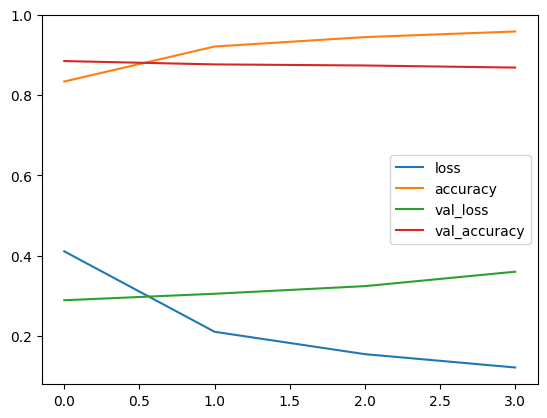

In [19]:
df = pd.DataFrame.from_dict(history.history)
df.plot()

### Evaluate on test data

In [21]:
model.evaluate(test_data_encoded, test_labels) # 87% accuracy on test data

469/469 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.8727


[0.3519933521747589, 0.8727333545684814]